In [89]:
import os
import pickle
def create_folder_if_not_exists(folder_path):
    """
    Creates a folder if it does not exist.

    :param folder_path: Path of the folder to create
    """
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Folder '{folder_path}' created.")
    else:
        print(f"Folder '{folder_path}' already exists.")
        
def file_exists(file_path):
    """
    Checks if a file exists.

    :param file_path: Path of the file to check
    :return: True if the file exists, False otherwise
    """
    return os.path.isfile(file_path)

folder_path = 'synthetique_databases'
create_folder_if_not_exists(folder_path)

def save_dic(d,s):
    with open(s+'.pickle', 'wb') as handle:
        pickle.dump(d, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
def read_dic(s):
    with open(s+'.pickle', 'rb') as handle:
        b = pickle.load(handle)
        return b

Folder 'synthetique_databases' already exists.


In [90]:
def repr(i):
    if type(i) == int:
        return str(i)
    else:
        return str(i[0])+"_"+str(i[1])

In [91]:
import math
nb_nodes = 1024
nb_graphs_er = 5
start = 3
nb_graphs_ba = 3
start_ba = 4
list_grid = [ ( int(math.sqrt(nb_nodes)),int(math.sqrt(nb_nodes))), (4,nb_nodes//4), (16,nb_nodes//16) ]

In [92]:
#generate ER graphs
import networkx as nx

list_er = [i for i in range(start, nb_graphs_er+start)]
for i in list_er:
    g = nx.fast_gnp_random_graph(nb_nodes, (math.log(nb_nodes)*i)/nb_nodes )
    file_path = folder_path + "/er_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    if not file_exists(file_path):
        nx.write_edgelist(g, file_path, data=False)

In [93]:
#generate BA graphs
list_ba = [i for i in range(start_ba, nb_graphs_ba+start_ba)]
for i in list_ba:
    g = nx.barabasi_albert_graph(nb_nodes, i)
    file_path = folder_path + "/ba_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    if not file_exists(file_path):
        nx.write_edgelist(g, file_path, data=False)

In [94]:
#generate grid graph
for i in list_grid:
    g = nx.grid_2d_graph(i[0],i[1])
    g = nx.convert_node_labels_to_integers(g)
    file_path = folder_path + "/gr_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    if not file_exists(file_path):
        nx.write_edgelist(g, file_path, data=False)

In [95]:
l = [("er", i) for i in range(start, nb_graphs_er+start)]
l += [("ba", i) for i in range(start_ba, nb_graphs_ba+start_ba)]
l += [ ("gr", e) for e in list_grid ]

In [96]:
#launch pre-computations
import subprocess
algos = ["linear", "ordered", "binary", "alias"]
j = 0
for x in l:
    i = x[1]
    print(i)
    file_path = folder_path + "/" + x[0] +"_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    #g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    for alg in algos:
        print("filepath : ",file_path)
        subprocess.run(["./main", file_path ,"u", alg, str(0), str(1), str(1), 'c']) 
    j += 1

3
filepath :  synthetique_databases/er_1024_3.edges
Graph name : synthetique_databases/er_1024_3
preprocessing.....
graphe principale print repr
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.002000 ms.
43 operations.
end queries
filepath :  synthetique_databases/er_1024_3.edges
Graph name : synthetique_databases/er_1024_3
preprocessing.....
graphe principale print repr
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.003000 ms.
64 operations.
end queries
filepath :  synthetique_databases/er_1024_3.edges
Graph name : synthetique_databases/er_1024_3
preprocessing.....
graphe principale print repr
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.001000 ms.

Graph name : synthetique_databases/ba_1024_5
preprocessing.....
graphe principale print repr
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.001000 ms.
19 operations.
end queries
filepath :  synthetique_databases/ba_1024_5.edges
Graph name : synthetique_databases/ba_1024_5
preprocessing.....
graphe principale print repr
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.002000 ms.
19 operations.
end queries
filepath :  synthetique_databases/ba_1024_5.edges
Graph name : synthetique_databases/ba_1024_5
preprocessing.....
graphe principale print repr
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.001000 ms.
17 operations.
end queries
filepath :  synthetique_

In [61]:
import random
def random_pairs(n, g, max_tries = 1000):
    V = g.nodes()
    res = []
    nb = 0
    tr = 0
    while nb <n and tr < max_tries:
        lV = list(V)
        pair = random.sample(lV, k = 2)
        if nx.has_path(g,pair[0],pair[1]):
            res.append(pair)
            nb += 1
        tr+=1
    if tr == max_tries:
        return -1
    return res

def random_pairs_exact(n, V):
    res = []
    for i in range(n):
        lV = list(V)
        pair = random.sample(lV, k = 2)
        res.append(pair)
    return res

def read_float_from_file(file_path):
    """
    Reads a single float value from a file.

    :param file_path: Path to the file
    :return: The float value read from the file
    """
    with open(file_path, 'r') as file:
        value = file.readline().strip()
        print("val", value)
        return float(value)
    
    
def read_integer_from_file(file_path):
    """
    Reads a single float value from a file.

    :param file_path: Path to the file
    :return: The float value read from the file
    """
    with open(file_path, 'r') as file:
        value = file.readline().strip()
        print("val", value)
        return int(value)
    
import numpy as np

def calculate_mean_and_std(array):
    """
    Calculates the mean and standard deviation of an array.

    :param array: Input array
    :return: A tuple containing mean and standard deviation
    """
    mean = np.mean(array)
    std_dev = np.std(array)
    return mean, std_dev

In [62]:
def read_integers_from_file(file_path):
    """
    Reads a file containing one integer on each line into an array.

    :param file_path: Path to the file
    :return: A list of integers read from the file
    """
    integers = []
    with open(file_path, 'r') as file:
        for line in file:
            # Strip any whitespace and convert the line to an integer
            integers.append(int(line.strip()))
    return integers

def read_floats_from_file(file_path):
    """
    Reads a file containing one integer on each line into an array.

    :param file_path: Path to the file
    :return: A list of integers read from the file
    """
    doubles = []
    with open(file_path, 'r') as file:
        for line in file:
            # Strip any whitespace and convert the line to an integer
            doubles.append(float(line.strip()))
    return doubles

distances = dict()
d_dist = dict()
for x in l:
    i = x[1]
    print(i)
    distances[x[0]+ "_"+repr(i)] = dict()
    d_dist[x[0]+ "_"+repr(i)] = dict()
    for j in range(nb_nodes):
        file_path = folder_path + "/" + x[0] + "_" + str(nb_nodes) + "_" + repr(i) + "_linear/distances_" + str(j) + ".csv"
        ll = read_integers_from_file(file_path)
        for z in range(len(ll)):
            if ll[z] in d_dist[x[0]+ "_"+repr(i)]:
                d_dist[x[0]+ "_"+repr(i)][ll[z]].append((j,z))
            else:
                d_dist[x[0]+ "_"+repr(i)][ll[z]] = [(j,z)]
            distances[x[0]+ "_"+repr(i)][(j,z)] = ll[z]
            distances[x[0]+ "_"+repr(i)][(z,j)] = ll[z]

3
4
5
6
7
4
5
6
(32, 32)
(4, 256)
(16, 64)


In [63]:
#launch simulations on er query time on average
pair_dist = "average"
nb_queries_per_pair = 50000
nb_pairs = 40
import subprocess
algos = ["linear", "ordered", "binary", "alias"]
d = { i: {alg:[]   for alg in algos}  for i in l }
for x in l:
    i = x[1]
    file_path = folder_path + "/" + x[0] + "_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    V = list(g.nodes())
    ll = random_pairs(nb_pairs, g)
    if ll == -1:
        print("problem pair sampling")
        break
    for e in ll:
        for alg in algos:
            print(alg, e)
            subprocess.run(["./main", file_path ,"u", alg, e[0], e[1], str(nb_queries_per_pair), "c"])
            file =  x[0]+ "_" + str(nb_nodes) + "_" + repr(i) + "_" + alg + "/queries_operations_"+ str(nb_queries_per_pair) + ".txt"
            d[x][alg].append(read_integer_from_file(folder_path + "/" + file)/(nb_queries_per_pair * distances[x[0]+ "_"+repr(i)][(int(e[0]),int(e[1]))] ))
            

linear ['38', '255']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
8.508000 ms.
1550000 operations.
end queries
val 1550000
ordered ['38', '255']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
9.417000 ms.
1550000 operations.
end queries
val 1550000
binary ['38', '255']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
9.357000 ms.
1350000 operations.
end queries
val 1350000
alias ['38', '255']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
12.929000 ms.
1350000 operations.
end queries
val 1350000
linear ['625', '20']
Graph name : s

Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
13.512000 ms.
1725056 operations.
end queries
val 1725056
ordered ['830', '180']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
11.684000 ms.
1725056 operations.
end queries
val 1725056
binary ['830', '180']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
9.431000 ms.
1925024 operations.
end queries
val 1925024
alias ['830', '180']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
12.277000 ms.
1350000 operations.
end queries
val 1350000
linear ['729', '1015']
Graph name : synthetique_dat

Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
13.147000 ms.
3746737 operations.
end queries
val 3746737
alias ['27', '731']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
18.531000 ms.
1850000 operations.
end queries
val 1850000
linear ['726', '537']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
15.800000 ms.
2853661 operations.
end queries
val 2853661
ordered ['726', '537']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
13.976000 ms.
2853661 operations.
end queries
val 2853661
binary ['726', '537']
Graph name : synthetique_data

Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
12.608000 ms.
1350000 operations.
end queries
val 1350000
linear ['79', '603']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
17.008000 ms.
3460855 operations.
end queries
val 3460855
ordered ['79', '603']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
13.865000 ms.
3342303 operations.
end queries
val 3342303
binary ['79', '603']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
13.880000 ms.
3946077 operations.
end queries
val 3946077
alias ['79', '603']
Graph name : synthetique_databas

Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
15.266000 ms.
3023747 operations.
end queries
val 3023747
ordered ['357', '119']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
14.822000 ms.
3023747 operations.
end queries
val 3023747
binary ['357', '119']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
14.270000 ms.
3338391 operations.
end queries
val 3338391
alias ['357', '119']
Graph name : synthetique_databases/er_1024_3
preprocessing for this type is already present
start queries
******************************
count operations not time
14.686000 ms.
1850000 operations.
end queries
val 1850000
linear ['107', '91']
Graph name : synthetique_data

Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
11.827000 ms.
1925000 operations.
end queries
val 1925000
alias ['476', '91']
Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
12.418000 ms.
1350000 operations.
end queries
val 1350000
linear ['713', '714']
Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
13.936000 ms.
3416860 operations.
end queries
val 3416860
ordered ['713', '714']
Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
14.702000 ms.
3385913 operations.
end queries
val 3385913
binary ['713', '714']
Graph name : synthetique_data

Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
18.924000 ms.
1850000 operations.
end queries
val 1850000
linear ['798', '93']
Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
8.994000 ms.
1725609 operations.
end queries
val 1725609
ordered ['798', '93']
Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
8.841000 ms.
1725609 operations.
end queries
val 1725609
binary ['798', '93']
Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
10.848000 ms.
1925261 operations.
end queries
val 1925261
alias ['798', '93']
Graph name : synthetique_databases

Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
20.951000 ms.
3281746 operations.
end queries
val 3281746
binary ['454', '208']
Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
15.527000 ms.
3685527 operations.
end queries
val 3685527
alias ['454', '208']
Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
21.952000 ms.
1850000 operations.
end queries
val 1850000
linear ['426', '320']
Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
20.395000 ms.
3651276 operations.
end queries
val 3651276
ordered ['426', '320']
Graph name : synthetique_dat

Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
23.696000 ms.
1850000 operations.
end queries
val 1850000
linear ['764', '1011']
Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
25.600000 ms.
5064051 operations.
end queries
val 5064051
ordered ['764', '1011']
Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
21.541000 ms.
4751746 operations.
end queries
val 4751746
binary ['764', '1011']
Graph name : synthetique_databases/er_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
19.743000 ms.
4468788 operations.
end queries
val 4468788
alias ['764', '1011']
Graph name : synthetique

Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
21.286000 ms.
5706784 operations.
end queries
val 5706784
binary ['985', '145']
Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
18.004000 ms.
4715081 operations.
end queries
val 4715081
alias ['985', '145']
Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
17.148000 ms.
1850000 operations.
end queries
val 1850000
linear ['583', '732']
Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
9.806000 ms.
1550000 operations.
end queries
val 1550000
ordered ['583', '732']
Graph name : synthetique_data

Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
6.026000 ms.
950000 operations.
end queries
val 950000
ordered ['1010', '862']
Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
9.948000 ms.
950000 operations.
end queries
val 950000
binary ['1010', '862']
Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
7.704000 ms.
850000 operations.
end queries
val 850000
alias ['1010', '862']
Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
7.704000 ms.
850000 operations.
end queries
val 850000
linear ['841', '58']
Graph name : synthetique_databases/er_

Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
13.047000 ms.
1724461 operations.
end queries
val 1724461
ordered ['17', '503']
Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
14.635000 ms.
1724461 operations.
end queries
val 1724461
binary ['17', '503']
Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
12.325000 ms.
1924769 operations.
end queries
val 1924769
alias ['17', '503']
Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
13.499000 ms.
1350000 operations.
end queries
val 1350000
linear ['200', '761']
Graph name : synthetique_databa

Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
25.547000 ms.
1850000 operations.
end queries
val 1850000
linear ['133', '8']
Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
13.604000 ms.
1725252 operations.
end queries
val 1725252
ordered ['133', '8']
Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
12.706000 ms.
1725252 operations.
end queries
val 1725252
binary ['133', '8']
Graph name : synthetique_databases/er_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
12.089000 ms.
1925108 operations.
end queries
val 1925108
alias ['133', '8']
Graph name : synthetique_databases/e

val 1350000
alias ['782', '65']
Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
13.433000 ms.
1350000 operations.
end queries
val 1350000
linear ['842', '580']
Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
8.969000 ms.
1724482 operations.
end queries
val 1724482
ordered ['842', '580']
Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
9.509000 ms.
1724482 operations.
end queries
val 1724482
binary ['842', '580']
Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
12.180000 ms.
1924778 operations.
end queries
val 1924778
alias ['842', '580'

Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
12.502000 ms.
1350000 operations.
end queries
val 1350000
linear ['1008', '396']
Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
6.109000 ms.
950000 operations.
end queries
val 950000
ordered ['1008', '396']
Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
5.023000 ms.
950000 operations.
end queries
val 950000
binary ['1008', '396']
Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
5.642000 ms.
850000 operations.
end queries
val 850000
alias ['1008', '396']
Graph name : synthetique_database

Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
13.322000 ms.
1350000 operations.
end queries
val 1350000
linear ['348', '131']
Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
13.468000 ms.
2074524 operations.
end queries
val 2074524
ordered ['348', '131']
Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
11.183000 ms.
2074524 operations.
end queries
val 2074524
binary ['348', '131']
Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
10.841000 ms.
2475076 operations.
end queries
val 2475076
alias ['348', '131']
Graph name : synthetique_dat

Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
15.153000 ms.
2299807 operations.
end queries
val 2299807
alias ['509', '622']
Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
15.200000 ms.
1350000 operations.
end queries
val 1350000
linear ['627', '905']
Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
10.956000 ms.
1550000 operations.
end queries
val 1550000
ordered ['627', '905']
Graph name : synthetique_databases/er_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
11.917000 ms.
1550000 operations.
end queries
val 1550000
binary ['627', '905']
Graph name : synthetique_dat

Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
14.442000 ms.
1550000 operations.
end queries
val 1550000
ordered ['117', '658']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
12.901000 ms.
1550000 operations.
end queries
val 1550000
binary ['117', '658']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
11.980000 ms.
1350000 operations.
end queries
val 1350000
alias ['117', '658']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
14.592000 ms.
1350000 operations.
end queries
val 1350000
linear ['269', '696']
Graph name : synthetique_dat

Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
11.066000 ms.
1550000 operations.
end queries
val 1550000
binary ['926', '986']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
11.816000 ms.
1350000 operations.
end queries
val 1350000
alias ['926', '986']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
14.001000 ms.
1350000 operations.
end queries
val 1350000
linear ['477', '665']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
21.132000 ms.
9282153 operations.
end queries
val 9282153
ordered ['477', '665']
Graph name : synthetique_dat

Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
21.111000 ms.
2475175 operations.
end queries
val 2475175
alias ['516', '156']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
17.770000 ms.
1350000 operations.
end queries
val 1350000
linear ['832', '731']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
16.391000 ms.
1725217 operations.
end queries
val 1725217
ordered ['832', '731']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
16.992000 ms.
1725217 operations.
end queries
val 1725217
binary ['832', '731']
Graph name : synthetique_dat

Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
14.317000 ms.
1350000 operations.
end queries
val 1350000
linear ['389', '87']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
12.630000 ms.
2075924 operations.
end queries
val 2075924
ordered ['389', '87']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
12.037000 ms.
2075924 operations.
end queries
val 2075924
binary ['389', '87']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
12.408000 ms.
2475135 operations.
end queries
val 2475135
alias ['389', '87']
Graph name : synthetique_databas

Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
17.149000 ms.
1350000 operations.
end queries
val 1350000
alias ['64', '27']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
16.463000 ms.
1350000 operations.
end queries
val 1350000
linear ['141', '279']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
8.501000 ms.
1897207 operations.
end queries
val 1897207
ordered ['141', '279']
Graph name : synthetique_databases/er_1024_7
preprocessing for this type is already present
start queries
******************************
count operations not time
8.821000 ms.
1897207 operations.
end queries
val 1897207
binary ['141', '279']
Graph name : synthetique_databas

Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
31.367000 ms.
2501659 operations.
end queries
val 2501659
ordered ['317', '685']
Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
26.233000 ms.
2501659 operations.
end queries
val 2501659
binary ['317', '685']
Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
23.420000 ms.
2802273 operations.
end queries
val 2802273
alias ['317', '685']
Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
29.561000 ms.
1850000 operations.
end queries
val 1850000
linear ['1002', '350']
Graph name : synthetique_da

Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
17.510000 ms.
2424442 operations.
end queries
val 2424442
alias ['519', '304']
Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
22.530000 ms.
1850000 operations.
end queries
val 1850000
linear ['36', '174']
Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
18.210000 ms.
2928603 operations.
end queries
val 2928603
ordered ['36', '174']
Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
20.669000 ms.
2851344 operations.
end queries
val 2851344
binary ['36', '174']
Graph name : synthetique_databa

Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
33.237000 ms.
3876783 operations.
end queries
val 3876783
binary ['297', '222']
val 5358424
alias ['297', '222']
Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
25.990000 ms.
5358424 operations.
end queries
Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
29.389000 ms.
2350000 operations.
end queries
val 2350000
linear ['621', '338']
Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
17.589000 ms.
2676533 operations.
end queries
val 2676533
ordered ['621', '338']
Graph name : synthetique_dat

Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
33.609000 ms.
2350000 operations.
end queries
val 2350000
linear ['671', '459']
Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
27.326000 ms.
3717253 operations.
end queries
val 3717253
ordered ['671', '459']
Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
29.863000 ms.
3533048 operations.
end queries
val 3533048
binary ['671', '459']
Graph name : synthetique_databases/ba_1024_4
preprocessing for this type is already present
start queries
******************************
count operations not time
29.171000 ms.
4372225 operations.
end queries
val 4372225
alias ['671', '459']
Graph name : synthetique_dat

Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
24.446000 ms.
1850000 operations.
end queries
val 1850000
linear ['314', '822']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
25.408000 ms.
3873059 operations.
end queries
val 3873059
ordered ['314', '822']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
26.484000 ms.
3810885 operations.
end queries
val 3810885
binary ['314', '822']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
29.011000 ms.
5412943 operations.
end queries
val 5412943
alias ['314', '822']
Graph name : synthetique_dat

val 3273269
ordered ['12', '674']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
23.641000 ms.
3249147 operations.
end queries
val 3249147
binary ['12', '674']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
25.323000 ms.
4150598 operations.
end queries
val 4150598
alias ['12', '674']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
28.525000 ms.
1850000 operations.
end queries
val 1850000
linear ['981', '75']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
16.959000 ms.
2325819 operations.
end queries
val 2325819
ordered ['981', '75'

Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
34.148000 ms.
3414762 operations.
end queries
val 3414762
ordered ['267', '942']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
28.598000 ms.
3414762 operations.
end queries
val 3414762
binary ['267', '942']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
28.601000 ms.
4538491 operations.
end queries
val 4538491
alias ['267', '942']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
35.319000 ms.
2350000 operations.
end queries
val 2350000
linear ['77', '809']
Graph name : synthetique_data

Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
23.345000 ms.
4184804 operations.
end queries
val 4184804
ordered ['662', '262']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
19.782000 ms.
4050957 operations.
end queries
val 4050957
binary ['662', '262']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
20.969000 ms.
5156093 operations.
end queries
val 5156093
alias ['662', '262']
Graph name : synthetique_databases/ba_1024_5
preprocessing for this type is already present
start queries
******************************
count operations not time
18.913000 ms.
2350000 operations.
end queries
val 2350000
linear ['842', '1015']
Graph name : synthetique_da

Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
20.979000 ms.
3711917 operations.
end queries
val 3711917
alias ['99', '895']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
22.264000 ms.
1850000 operations.
end queries
val 1850000
linear ['436', '144']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
13.311000 ms.
2796660 operations.
end queries
val 2796660
ordered ['436', '144']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
12.530000 ms.
2796660 operations.
end queries
val 2796660
binary ['436', '144']
Graph name : synthetique_data

Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
18.343000 ms.
3025105 operations.
end queries
val 3025105
ordered ['257', '336']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
20.480000 ms.
3025105 operations.
end queries
val 3025105
binary ['257', '336']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
15.816000 ms.
4097488 operations.
end queries
val 4097488
alias ['257', '336']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
16.516000 ms.
1850000 operations.
end queries
val 1850000
linear ['688', '197']
Graph name : synthetique_dat

Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
16.561000 ms.
1850000 operations.
end queries
val 1850000
alias ['822', '619']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
22.441000 ms.
1850000 operations.
end queries
val 1850000
linear ['936', '382']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
21.531000 ms.
2673712 operations.
end queries
val 2673712
ordered ['936', '382']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
15.357000 ms.
2673712 operations.
end queries
val 2673712
binary ['936', '382']
Graph name : synthetique_dat

Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
22.385000 ms.
2799943 operations.
end queries
val 2799943
alias ['953', '634']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
34.844000 ms.
1850000 operations.
end queries
val 1850000
linear ['732', '168']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
25.496000 ms.
3083254 operations.
end queries
val 3083254
ordered ['732', '168']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
22.720000 ms.
3083254 operations.
end queries
val 3083254
binary ['732', '168']
Graph name : synthetique_dat

Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
23.016000 ms.
3262096 operations.
end queries
val 3262096
alias ['383', '917']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
29.684000 ms.
1850000 operations.
end queries
val 1850000
linear ['521', '730']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
21.473000 ms.
2323677 operations.
end queries
val 2323677
ordered ['521', '730']
Graph name : synthetique_databases/ba_1024_6
preprocessing for this type is already present
start queries
******************************
count operations not time
23.305000 ms.
2323677 operations.
end queries
val 2323677
binary ['521', '730']
Graph name : synthetique_dat

Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
178.248000 ms.
28933208 operations.
end queries
val 28933208
binary ['898', '476']
Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
175.717000 ms.
35506967 operations.
end queries
val 35506967
alias ['898', '476']
Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
189.980000 ms.
20350000 operations.
end queries
val 20350000
linear ['943', '533']
Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
67.521000 ms.
15653935 operations.
end queries
val 15653935
ordered ['943', '533']
G

Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
85.494000 ms.
18596027 operations.
end queries
val 18596027
ordered ['412', '522']
Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
72.295000 ms.
14864810 operations.
end queries
val 14864810
binary ['412', '522']
Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
80.844000 ms.
13878492 operations.
end queries
val 13878492
alias ['412', '522']
Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
129.823000 ms.
11350000 operations.
end queries
val 11350000
linear ['191', '88']
Grap

Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
30.821000 ms.
5309570 operations.
end queries
val 5309570
binary ['328', '236']
Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
27.709000 ms.
6190926 operations.
end queries
val 6190926
alias ['328', '236']
Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
35.050000 ms.
3850000 operations.
end queries
val 3850000
linear ['528', '792']
Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
82.886000 ms.
12435819 operations.
end queries
val 12435819
ordered ['528', '792']
Graph name

Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
102.709000 ms.
11750000 operations.
end queries
val 11750000
ordered ['402', '1010']
Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
74.654000 ms.
11750000 operations.
end queries
val 11750000
binary ['402', '1010']
Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
85.465000 ms.
9850000 operations.
end queries
val 9850000
alias ['402', '1010']
Graph name : synthetique_databases/gr_1024_32_32
preprocessing for this type is already present
start queries
******************************
count operations not time
109.468000 ms.
9850000 operations.
end queries
val 9850000
linear ['934', '734']
Gra

Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
280.488000 ms.
51695877 operations.
end queries
val 51695877
binary ['637', '809']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
321.447000 ms.
43498200 operations.
end queries
val 43498200
alias ['637', '809']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
493.327000 ms.
42850000 operations.
end queries
val 42850000
linear ['558', '673']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
493.551000 ms.
69350000 operations.
end queries
val 69350000
ordered ['558', '673']


Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
218.290000 ms.
61404916 operations.
end queries
val 61404916
alias ['875', '559']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
282.706000 ms.
30850000 operations.
end queries
val 30850000
linear ['597', '261']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
252.482000 ms.
49295352 operations.
end queries
val 49295352
ordered ['597', '261']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
256.376000 ms.
49295352 operations.
end queries
val 49295352
binary ['597', '261']


Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
886.771000 ms.
94850000 operations.
end queries
val 94850000
linear ['512', '461']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
814.499000 ms.
124298257 operations.
end queries
val 124298257
ordered ['512', '461']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
815.684000 ms.
124298481 operations.
end queries
val 124298481
binary ['512', '461']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
734.460000 ms.
206585198 operations.
end queries
val 206585198
alias ['512', '

Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
444.539000 ms.
78950000 operations.
end queries
val 78950000
ordered ['575', '706']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
418.145000 ms.
78950000 operations.
end queries
val 78950000
binary ['575', '706']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
565.654000 ms.
65850000 operations.
end queries
val 65850000
alias ['575', '706']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
663.651000 ms.
65850000 operations.
end queries
val 65850000
linear ['123', '156']


Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
162.857000 ms.
22028510 operations.
end queries
val 22028510
binary ['675', '130']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
120.897000 ms.
35144901 operations.
end queries
val 35144901
alias ['675', '130']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
154.119000 ms.
17850000 operations.
end queries
val 17850000
linear ['972', '709']
Graph name : synthetique_databases/gr_1024_4_256
preprocessing for this type is already present
start queries
******************************
count operations not time
29.503000 ms.
5456292 operations.
end queries
val 5456292
ordered ['972', '709']
Gra

Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
31.509000 ms.
6193158 operations.
end queries
val 6193158
alias ['927', '731']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
33.551000 ms.
3850000 operations.
end queries
val 3850000
linear ['417', '779']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
99.272000 ms.
23749215 operations.
end queries
val 23749215
ordered ['417', '779']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
93.429000 ms.
19135473 operations.
end queries
val 19135473
binary ['417', '779']
Graph na

Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
292.111000 ms.
33350000 operations.
end queries
val 33350000
linear ['691', '795']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
80.936000 ms.
21559618 operations.
end queries
val 21559618
ordered ['691', '795']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
88.531000 ms.
16620796 operations.
end queries
val 16620796
binary ['691', '795']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
81.514000 ms.
14632273 operations.
end queries
val 14632273
alias ['691', '795']
Gra

Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
78.615000 ms.
16448208 operations.
end queries
val 16448208
ordered ['625', '669']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
65.051000 ms.
13283459 operations.
end queries
val 13283459
binary ['625', '669']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
61.417000 ms.
11492791 operations.
end queries
val 11492791
alias ['625', '669']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
95.696000 ms.
10850000 operations.
end queries
val 10850000
linear ['90', '664']
Graph

Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
156.414000 ms.
48238687 operations.
end queries
val 48238687
alias ['379', '205']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
226.551000 ms.
24350000 operations.
end queries
val 24350000
linear ['501', '423']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
55.208000 ms.
9676018 operations.
end queries
val 9676018
ordered ['501', '423']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
67.349000 ms.
9676018 operations.
end queries
val 9676018
binary ['501', '423']
Graph 

Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
118.945000 ms.
11350000 operations.
end queries
val 11350000
linear ['29', '77']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
74.437000 ms.
13346696 operations.
end queries
val 13346696
ordered ['29', '77']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
61.523000 ms.
10878916 operations.
end queries
val 10878916
binary ['29', '77']
Graph name : synthetique_databases/gr_1024_16_64
preprocessing for this type is already present
start queries
******************************
count operations not time
65.774000 ms.
9491087 operations.
end queries
val 9491087
alias ['29', '77']
Graph name : 

In [20]:
# #launch simulations on er query time on long distance
# # last third of distances
# pair_dist = "long"
# max_dist = { i: max(d_dist[x[0]+ "_"+repr(x[1])])  for x in l  }


# nb_queries_per_pair = 500000
# nb_pairs = 30
# import subprocess
# algos = ["linear", "ordered", "binary", "alias"]
# d = { i: {alg:[]   for alg in algos}  for i in l }

# for x in l:
#     i = x[1]
#     file_path = folder_path + "/" + x[0] + "_" + str(nb_nodes) + "_" + repr(i) + ".edges"
#     g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
#     V = list(g.nodes())
#     pairs = []
#     if pair_dist == "long":
#         for zz in range(int(max_dist[i]*2/3), max_dist[i]):
#             pairs += d_dist[i][zz]
#     if pair_dist == "medium":
#         for zz in range(int(max_dist[i]*1/3), max_dist[i]*2/3):
#             pairs += d_dist[i][zz]
#     if pair_dist == "short":
#         for zz in range(int(max_dist[i]), max_dist[i]*1/3):
#             pairs += d_dist[i][zz]
#     ll = random_pairs_exact(nb_pairs, pairs)
#     if ll == -1:
#         print("problem pair sampling")
#         break
#     for e in ll:
#         for alg in algos:
#             subprocess.run(["./main", file_path ,"u", alg, str(e[0]), str(e[1]), str(nb_queries_per_pair), "c"])
#             file = "er_" + str(nb_nodes) + "_" + str(i) + "_" + alg + "/queries_operations_"+ str(nb_queries_per_pair) + ".txt"
#             d[x][alg].append(read_integer_from_file(folder_path + "/" + file))
            

In [64]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bar_chart(data, xlabel, ylabel, legend, filename, dim1 = 8, dim2 = 5, bar_w = 0.15):
    """
    Plots a bar chart where the x-axis is represented by the keys of the dictionary.
    Each key in the dictionary maps to another dictionary with 4 keys representing bars.
    The values are tuples (mean, standard deviation).

    :param data: Dictionary containing the data to plot
    """

    categories = list(data.keys())
    subcategories = list(next(iter(data.values())).keys())
    
    # Number of groups and bars per group
    n_groups = len(categories)
    n_bars = len(subcategories)
    
    fig, ax = plt.subplots(figsize=(dim1, dim2))
    
    # Create figure and axis
    #fig, ax = plt.subplots()

    # Bar width
    bar_width = bar_w

    # X locations for the groups
    index = np.arange(n_groups)
    
    # Iterate through each subcategory and plot the bars
    for i, subcategory in enumerate(subcategories):
        means = [data[category][subcategory][0] for category in categories]
        std_devs = [data[category][subcategory][1] for category in categories]
        ax.bar(index + i * bar_width, means, bar_width, yerr=std_devs, label=subcategory)

    # Add labels, title, and legend
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(legend)
    ax.set_xticks(index + bar_width * (n_bars - 1) / 2)
    ax.set_xticklabels(categories)
    ax.legend()


    # Show plot
    plt.rcParams.update({'font.size': 13})
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()

# # Example usage:
# data = {
#     'A': {'bar1': (5, 1), 'bar2': (6, 1.5), 'bar3': (7, 2), 'bar4': (8, 2.5)},
#     'B': {'bar1': (4, 1.2), 'bar2': (5, 1.3), 'bar3': (6, 1.8), 'bar4': (7, 2.1)},
#     'C': {'bar1': (3, 0.8), 'bar2': (4, 1.1), 'bar3': (5, 1.6), 'bar4': (6, 2.0)}
# }

# data = {i:  { e: calculate_mean_and_std(d[i][e])   for e in algos }  for i in list_p}

# plot_bar_chart(data)

In [65]:
def name(i):
    if i[0] != "gr":
        return i[0]+"_"+str(i[1])
    else:
        return str(i[1][0])+"_"+str(i[1][1])

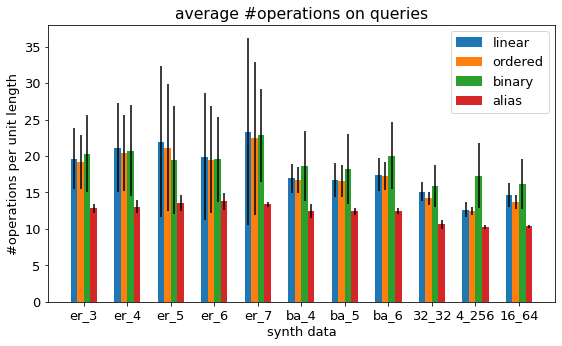

In [67]:
data = {name(i):  { e: calculate_mean_and_std(d[i][e])   for e in algos }  for i in l}
save_dic(data,"queries_synth")
plot_bar_chart(data, "synth data", "#operations per unit length", "average #operations on queries", "queries.pdf")

In [68]:
# data = {i:  { e: calculate_mean_and_std(d[i][e])   for e in algos }  for i in l if i[0]!="gr"}
# plot_bar_chart(data, "synth data", "#operations", "average #operations on queries", "queries2.pdf")

In [69]:
l = [("er", i) for i in range(start, nb_graphs_er+start)]
l += [("ba", i) for i in range(start_ba, nb_graphs_ba+start_ba)]
l += [ ("gr", e) for e in list_grid ]

In [70]:
#launch bars on pre-computations
import subprocess
algos = ["linear", "ordered", "binary", "alias"]
d_pre = { i: {alg:[]   for alg in algos}  for i in l }
for x in l:
    i = x[1]
    for alg in algos:
        file =  x[0] +  "_" + str(nb_nodes) + "_" + repr(i) + "_" + alg + "/pre_time.csv"
        ll = read_integers_from_file(folder_path+"/"+file)
        d_pre[x][alg] = ll

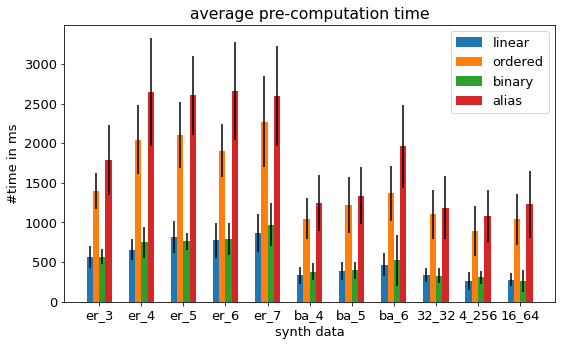

In [71]:
data = {name(i):  { e: calculate_mean_and_std(d_pre[i][e])   for e in algos }  for i in l}
save_dic(data,"pre_computation_synth")
plot_bar_chart(data, "synth data", "#time in ms", "average pre-computation time", "pre_comp.pdf")

In [72]:
# data = {i[0]+"_"+repr(i[1]):  { e: calculate_mean_and_std(d_pre[i][e])   for e in algos }  for i in l if i[0]!="gr"}
# plot_bar_chart(data, "er, p = (xlog(n)/n)", "#time in ms", "average pre-computation time", "pre_comp2.pdf")

In [73]:
def construct_dag(l):
    g = nx.DiGraph()
    for e in l:
        for i in range(1,len(e)):
            if (e[i-1],e[i]) not in g.edges:
                g.add_edge(e[i-1],e[i])
    return g
def connected_gnp(n,p, max_tries = 10, directed = False):
    i = 0
    while i < max_tries:
        g = nx.fast_gnp_random_graph(N, p, directed=directed)
        if nx.is_connected(g):
            return g
        i += 1
    return None

def random_pairs_more_sh(g, V, max_tries = 10):
    i = 0
    while i < max_tries:
        lV = list(V)
        pair = random.sample(lV, k = 2)
        l = list(map(lambda x:tuple(x), nx.all_shortest_paths(g, source=pair[0], target=pair[1])))
        if len(l) > 1:
            return l, pair
        i += 1
    return None


from math import prod
def prob_URW(dag, w):
    return prod( 1/dag.in_degree(w[i])  for i in range(1,len(w)))
def dist_URW(dag, l):
    return list(map( lambda x : prob_URW(dag, x), l ))

def random_weights(g,s,t):
    h = g.copy()
    n = len(g.nodes())
    for e in h.edges():
        h[e[0]][e[1]]['weight'] = 1 + random.uniform(-1/n,1/n)
    return nx.dijkstra_path(h, s, t, weight='weight')

def stat_random_weights(g,s,t,l, nb = 100):
    d = dict()
    for _ in range(nb):
        e = random_weights(g,s,t)
        te = tuple(e)
        if te in d:
            d[te] += 1
        else:
            d[te] = 1
    res = []
    for e in l:
        if e in d:
            res.append(d[e]/nb)
        else:
            res.append(0)
    return res
    

In [77]:
import networkx as nx
l = [("er", i) for i in range(start, nb_graphs_er+start)]
l += [("ba", i) for i in range(start_ba, nb_graphs_ba+start_ba)]
# l += [ ("gr", e) for e in list_grid ]

In [26]:
from scipy.stats import wasserstein_distance
#launch simulations on biased algos
pair_dist = "average"
nb_pairs = 10
import subprocess
algos = ["random_weights", "URW"]
d_was = { i: {alg:[]   for alg in algos}  for i in l }
for x in l:
    print(x)
    i = x[1]
    file_path = folder_path + "/" + x[0] + "_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    V = list(g.nodes())
    ll = random_pairs(nb_pairs, g)
    if ll == -1:
        print("problem pair sampling")
        break
    for e in ll:
        for alg in algos: 
            file =  x[0]+ "_" + str(nb_nodes) + "_" + repr(i) + "_" + "linear" + "/"+ e[0] + ".edges"
            dag = nx.read_edgelist(folder_path + "/" + file, create_using=nx.DiGraph, data=False)
            sl = list(map(lambda x:tuple(x), nx.all_shortest_paths(g, source=e[0], target=e[1])))
            print("nb shortest", len(sl))
            if alg == "random_weights":
                res = stat_random_weights(g,e[0],e[1],sl, nb = len(sl)*10)
            else:
                res = dist_URW(dag, sl )
            res_unif = [ 1/len(sl) for e in sl ]
            wr = wasserstein_distance(res_unif, res)
            print(alg, wr)
            d_was[x][alg].append(wr)
            

('er', 3)
nb shortest 1
random_weights 0.0
nb shortest 1
URW 0.0
nb shortest 9
random_weights 0.03209876543209877
nb shortest 9
URW 0.02160493827160494
nb shortest 2
random_weights 0.09999999999999998
nb shortest 2
URW 0.0
nb shortest 3
random_weights 0.02222222222222222
nb shortest 3
URW 0.0
nb shortest 1
random_weights 0.0
nb shortest 1
URW 0.0
nb shortest 5
random_weights 0.08
nb shortest 5
URW 0.06
nb shortest 6
random_weights 0.03888888888888889
nb shortest 6
URW 0.0
nb shortest 6
random_weights 0.03333333333333333
nb shortest 6
URW 0.0
nb shortest 3
random_weights 0.1111111111111111
nb shortest 3
URW 0.0
nb shortest 15
random_weights 0.01688888888888889
nb shortest 15
URW 0.026666666666666665
('er', 4)
nb shortest 2
random_weights 0.0
nb shortest 2
URW 0.0
nb shortest 1
random_weights 0.0
nb shortest 1
URW 0.0
nb shortest 1
random_weights 0.0
nb shortest 1
URW 0.0
nb shortest 1
random_weights 0.0
nb shortest 1
URW 0.0
nb shortest 31
random_weights 0.006659729448491154
nb shortest

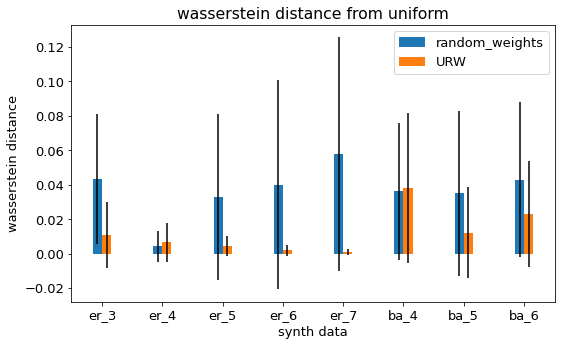

In [30]:
data = {name(i):  { e: calculate_mean_and_std(d_was[i][e])   for e in algos }  for i in l}
plot_bar_chart(data, "synth data", "wasserstein distance", "wasserstein distance from uniform", "biase_more_one.pdf", dim1 = 5, dim2 = 5, bar_w = 0.25)

In [38]:
from scipy.stats import wasserstein_distance
#launch simulations on biased algos with more than one sp
pair_dist = "average"
nb_pairs = 30
import subprocess
algos = ["random_weights", "URW"]
d_was_1 = { i: {alg:[]   for alg in algos}  for i in l }
for x in l:
    print(x)
    i = x[1]
    file_path = folder_path + "/" + x[0] + "_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    nb_effective = 0
    while nb_effective < nb_pairs:    
        ll = random_pairs(1, g)
        if ll == -1:
            print("problem pair sampling")
            break
        e = ll[0]
        file =  x[0]+ "_" + str(nb_nodes) + "_" + repr(i) + "_" + "linear" + "/"+ e[0] + ".edges"
        dag = nx.read_edgelist(folder_path + "/" + file, create_using=nx.DiGraph, data=False)
        sl = list(map(lambda x:tuple(x), nx.all_shortest_paths(g, source=e[0], target=e[1])))
        print("nb shortest", len(sl))
        if len(sl) != 1:
            nb_effective += 1
        else:
            continue
        for alg in algos:
            print("entered")
            if alg == "random_weights":
                res = stat_random_weights(g,e[0],e[1],sl, nb = len(sl)*10)
            else:
                res = dist_URW(dag, sl )
            res_unif = [ 1/len(sl) for e in sl ]
            wr = wasserstein_distance(res_unif, res)
            print(alg, wr)
            d_was_1[x][alg].append(wr)


('er', 3)
nb shortest 5
entered
random_weights 0.04
entered
URW 0.0
nb shortest 1
nb shortest 1
nb shortest 4
entered
random_weights 0.05000000000000001
entered
URW 0.0
nb shortest 5
entered
random_weights 0.04000000000000001
entered
URW 0.0
nb shortest 8
entered
random_weights 0.040625
entered
URW 0.02678571428571428
nb shortest 8
entered
random_weights 0.021875000000000002
entered
URW 0.05625
nb shortest 7
entered
random_weights 0.0326530612244898
entered
URW 0.0
nb shortest 2
entered
random_weights 0.05000000000000002
entered
URW 0.0
nb shortest 12
entered
random_weights 0.015277777777777779
entered
URW 0.022222222222222227
nb shortest 3
entered
random_weights 0.11111111111111113
entered
URW 0.0
nb shortest 3
entered
random_weights 0.06666666666666668
entered
URW 0.0
nb shortest 1
nb shortest 5
entered
random_weights 0.024
entered
URW 0.0
nb shortest 14
entered
random_weights 0.017346938775510204
entered
URW 0.022263450834879406
nb shortest 7
entered
random_weights 0.036734693877551

random_weights 0.09999999999999998
entered
URW 0.0
nb shortest 3
entered
random_weights 0.02222222222222222
entered
URW 0.0
nb shortest 2
entered
random_weights 0.15000000000000002
entered
URW 0.0
nb shortest 1
nb shortest 3
entered
random_weights 0.04444444444444444
entered
URW 0.0
nb shortest 73
entered
random_weights 0.003377744417339089
entered
URW 0.004774712787473155
nb shortest 4
entered
random_weights 0.0375
entered
URW 0.0
nb shortest 2
entered
random_weights 0.05000000000000002
entered
URW 0.0
nb shortest 2
entered
random_weights 0.19999999999999998
entered
URW 0.0
nb shortest 3
entered
random_weights 0.02222222222222222
entered
URW 0.0
nb shortest 1
nb shortest 4
entered
random_weights 0.024999999999999994
entered
URW 0.0
nb shortest 3
entered
random_weights 0.06666666666666668
entered
URW 0.0
nb shortest 1
nb shortest 4
entered
random_weights 0.04999999999999999
entered
URW 0.0
nb shortest 1
nb shortest 5
entered
random_weights 0.056
entered
URW 0.0
nb shortest 3
entered
ra

random_weights 0.044444444444444446
entered
URW 0.055555555555555546
nb shortest 3
entered
random_weights 0.1111111111111111
entered
URW 0.0
nb shortest 2
entered
random_weights 0.15000000000000002
entered
URW 0.0
nb shortest 6
entered
random_weights 0.03333333333333333
entered
URW 0.04444444444444445
nb shortest 2
entered
random_weights 0.0
entered
URW 0.0
nb shortest 1
nb shortest 2
entered
random_weights 0.05000000000000002
entered
URW 0.0
nb shortest 6
entered
random_weights 0.05
entered
URW 0.05555555555555555
nb shortest 30
entered
random_weights 0.010888888888888889
entered
URW 0.01888888888888889
nb shortest 5
entered
random_weights 0.032
entered
URW 0.06
nb shortest 1
nb shortest 4
entered
random_weights 0.07500000000000001
entered
URW 0.08333333333333333
nb shortest 1
nb shortest 4
entered
random_weights 0.0625
entered
URW 0.08333333333333333
nb shortest 1
nb shortest 20
entered
random_weights 0.0175
entered
URW 0.023333333333333334
nb shortest 2
entered
random_weights 0.0999

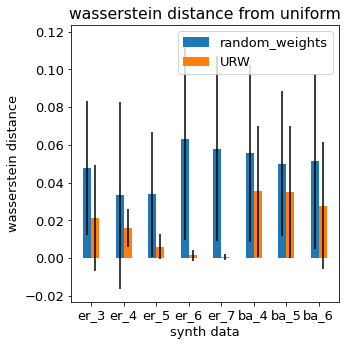

In [39]:
data = {name(i):  { e: calculate_mean_and_std(d_was_1[i][e])   for e in algos }  for i in l}
plot_bar_chart(data, "synth data", "wasserstein distance", "wasserstein distance from uniform", "biase_more_one.pdf", dim1 = 5, dim2 = 5, bar_w = 0.25)

In [75]:
def get_folder_size(folder_path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(folder_path):
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            if os.path.isfile(file_path):
                total_size += os.path.getsize(file_path)
    return total_size

In [101]:
memory = dict()
algos = ["linear", "ordered", "binary", "alias"]
#launch bars on pre-computations
import subprocess
memory = { i: {alg:[]   for alg in algos}  for i in l }
for x in l:
    for alg in algos:
        file =  x[0] +"_" + str(nb_nodes) + "_" + repr(x[1]) + "_" + alg
        print("file", file)
        subprocess.Popen("rm " + folder_path+"/"+file+"/"+"queries*", shell=True,
                                    stdout=subprocess.PIPE,
                                    stderr=subprocess.PIPE)
        subprocess.run(["mv", folder_path+"/"+file+"/"+"pre_time.csv", folder_path+"/"])
        memory[x][alg] = [get_folder_size(folder_path+"/"+file)]
        subprocess.run(["mv", folder_path + "/" + "pre_time.csv", folder_path+"/"+file+"/"])

file er_1024_3_linear
file er_1024_3_ordered
file er_1024_3_binary
file er_1024_3_alias
file er_1024_4_linear
file er_1024_4_ordered
file er_1024_4_binary
file er_1024_4_alias
file er_1024_5_linear
file er_1024_5_ordered
file er_1024_5_binary
file er_1024_5_alias
file er_1024_6_linear
file er_1024_6_ordered
file er_1024_6_binary
file er_1024_6_alias
file er_1024_7_linear
file er_1024_7_ordered
file er_1024_7_binary
file er_1024_7_alias
file ba_1024_4_linear
file ba_1024_4_ordered
file ba_1024_4_binary
file ba_1024_4_alias
file ba_1024_5_linear
file ba_1024_5_ordered
file ba_1024_5_binary
file ba_1024_5_alias
file ba_1024_6_linear
file ba_1024_6_ordered
file ba_1024_6_binary
file ba_1024_6_alias
file gr_1024_32_32_linear
file gr_1024_32_32_ordered
file gr_1024_32_32_binary
file gr_1024_32_32_alias
file gr_1024_4_256_linear
file gr_1024_4_256_ordered
file gr_1024_4_256_binary
file gr_1024_4_256_alias
file gr_1024_16_64_linear
file gr_1024_16_64_ordered
file gr_1024_16_64_binary
file gr_1

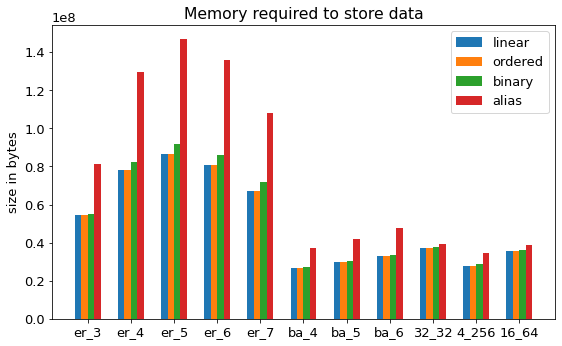

In [105]:
data = {name(i):  { e: calculate_mean_and_std(memory[i][e])   for e in algos }  for i in l}
save_dic(data,"memory_synth")

plot_bar_chart(data, "", "size in bytes", "Memory required to store data", "memory_real.pdf",  bar_w = 0.15)